In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Group

In [2]:
all_cones = Table.read_table('cones.csv')
#all_cones
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [3]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [4]:
cones.group('Flavor', sum)
#help(cones.group)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [5]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 5.25, 5.25])

In [6]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

In [7]:
sum(cones.where('Flavor', are.equal_to('strawberry')).column('Price'))

8.8

In [9]:
cones.group('Flavor', min)

Flavor,Price min
chocolate,4.75
strawberry,3.55


In [10]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.55, 5.25]"


Which NBA team payed their players the most?

In [11]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Keep only team and salary columns for analysis

In [12]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money

TEAM,SALARY
Atlanta Hawks,18.6717
Atlanta Hawks,12
Atlanta Hawks,9.75625
Atlanta Hawks,8
Atlanta Hawks,5.74648
Atlanta Hawks,4
Atlanta Hawks,3.33333
Atlanta Hawks,2
Atlanta Hawks,1.7634
Atlanta Hawks,1.30452


In [13]:
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


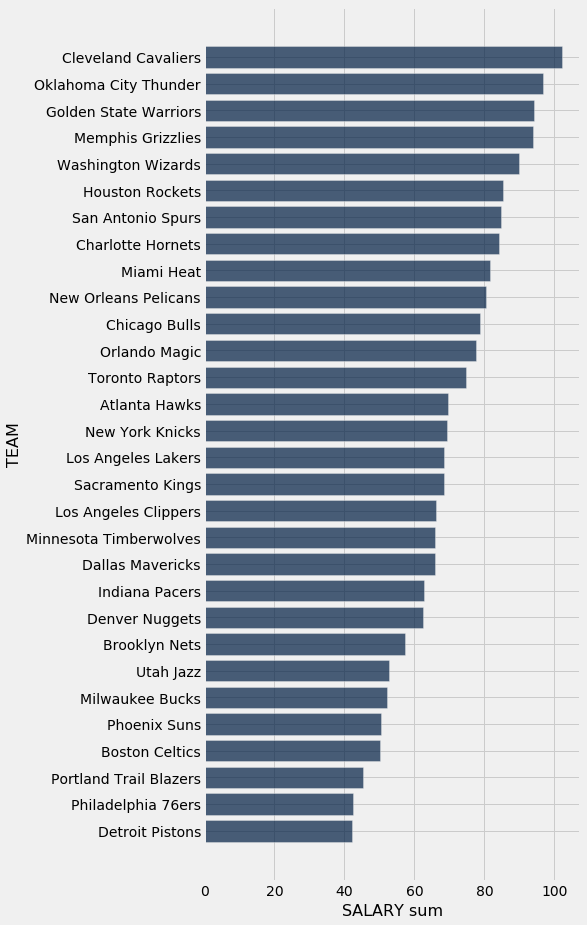

In [14]:
teams_and_money.group('TEAM', sum).sort(1, descending=True).barh('TEAM')

In [17]:
nba.select('POSITION', 'SALARY').group('POSITION', max)

POSITION,SALARY max
C,22.3594
PF,22.1927
PG,21.4687
SF,25
SG,20


In [18]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [19]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


## Group by multiple columns

In [20]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [21]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [22]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [23]:
all_cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


## Challenge question

Which NBA teams spent the most on their starters in 2016?
* Each team has one starter per position
* Assume the starter for a team & position is the player with the highest salary on that team in that position

In [ ]:
nba

In [24]:
starters = nba.drop('PLAYER').group(['POSITION', 'TEAM'],max)
starters

POSITION,TEAM,SALARY max
C,Atlanta Hawks,12
C,Boston Celtics,2.61698
C,Brooklyn Nets,1.3629
C,Charlotte Hornets,13.5
C,Chicago Bulls,13.4
C,Cleveland Cavaliers,14.2609
C,Dallas Mavericks,5.2
C,Denver Nuggets,5.6135
C,Detroit Pistons,6.5
C,Golden State Warriors,13.8


In [25]:
starters.drop('POSITION').group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


## Pivot tables

In [26]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [29]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=min)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,3.55


In [28]:
all_cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55


In [30]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [33]:
nba.pivot('POSITION', 'TEAM', values='SALARY', collect=sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


## Joins

In [38]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Panda Tea Lounge', 4],
    ['Espresso', 'Gimme',  2],
    ['Latte',    'Gimme',  3],
    ['Espresso', "Cafe Gola",   2]
])
drinks
drinks = drinks.with_row(['Americano', 'Gimme', 3])
drinks

Drink,Cafe,Price
Milk Tea,Panda Tea Lounge,4
Espresso,Gimme,2
Latte,Gimme,3
Espresso,Cafe Gola,2
Americano,Gimme,3


In [39]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Panda Tea Lounge', 'Gimme', 'Gimme')
)
discounts

Coupon % off,Location
25,Panda Tea Lounge
50,Gimme
5,Gimme


In [40]:
t = drinks.join('Cafe', discounts, 'Location')
t

Cafe,Drink,Price,Coupon % off
Gimme,Espresso,2,50
Gimme,Espresso,2,5
Gimme,Latte,3,50
Gimme,Latte,3,5
Gimme,Americano,3,50
Gimme,Americano,3,5
Panda Tea Lounge,Milk Tea,4,25


In [41]:
t.with_column('Discounted', t.column(2) * (1 - t.column(3)/ 100))

Cafe,Drink,Price,Coupon % off,Discounted
Gimme,Espresso,2,50,1
Gimme,Espresso,2,5,1.9
Gimme,Latte,3,50,1.5
Gimme,Latte,3,5,2.85
Gimme,Americano,3,50,1.5
Gimme,Americano,3,5,2.85
Panda Tea Lounge,Milk Tea,4,25,3


In [42]:
two = drinks.join('Cafe', drinks)
two

Cafe,Drink,Price,Drink_2,Price_2
Cafe Gola,Espresso,2,Espresso,2
Gimme,Espresso,2,Espresso,2
Gimme,Espresso,2,Latte,3
Gimme,Espresso,2,Americano,3
Gimme,Latte,3,Espresso,2
Gimme,Latte,3,Latte,3
Gimme,Latte,3,Americano,3
Gimme,Americano,3,Espresso,2
Gimme,Americano,3,Latte,3
Gimme,Americano,3,Americano,3


In [43]:
two.with_column('Total', two.column('Price') + two.column('Price_2'))

Cafe,Drink,Price,Drink_2,Price_2,Total
Cafe Gola,Espresso,2,Espresso,2,4
Gimme,Espresso,2,Espresso,2,4
Gimme,Espresso,2,Latte,3,5
Gimme,Espresso,2,Americano,3,5
Gimme,Latte,3,Espresso,2,5
Gimme,Latte,3,Latte,3,6
Gimme,Latte,3,Americano,3,6
Gimme,Americano,3,Espresso,2,5
Gimme,Americano,3,Latte,3,6
Gimme,Americano,3,Americano,3,6


## Bikes

From Citi Bike System Data website: https://www.citibikenyc.com/system-data.

In [44]:
citi = Table.read_table('citibike_nyc_201707_250000.csv')
citi

tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.7153,-73.9602,3107,Bedford Ave & Nassau Ave,40.7231,-73.9521,14744,Subscriber,1986,1
2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.7302,-73.991,3425,2 Ave & E 104 St,40.7892,-73.9437,19587,Subscriber,1981,1
328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691,-73.9918,3397,Court St & Nelson St,40.6764,-73.9987,27937,Subscriber,1984,2
2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.7169,-73.9632,398,Atlantic Ave & Furman St,40.6917,-74,26066,Subscriber,1985,1
2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.7169,-73.9632,398,Atlantic Ave & Furman St,40.6917,-74,29408,Subscriber,1982,2
545,2017-07-01 00:00:18,2017-07-01 00:09:24,361,Allen St & Hester St,40.7161,-73.9919,502,Henry St & Grand St,40.7142,-73.9813,21203,Subscriber,1954,2
1496,2017-07-01 00:00:18,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.7572,-73.9781,546,E 30 St & Park Ave S,40.7444,-73.983,15933,Customer,1971,1
1495,2017-07-01 00:00:19,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.7572,-73.9781,546,E 30 St & Park Ave S,40.7444,-73.983,18515,Customer,1964,2
593,2017-07-01 00:00:27,2017-07-01 00:10:20,3314,W 95 St & Broadway,40.7938,-73.9719,3363,E 102 St & Park Ave,40.7905,-73.9503,29135,Subscriber,1982,1
1950,2017-07-01 00:00:30,2017-07-01 00:33:00,3085,Roebling St & N 4 St,40.7147,-73.9574,468,Broadway & W 56 St,40.7653,-73.9819,17365,Subscriber,1983,1


In [45]:
trips = citi.relabeled("start station name", "start")\
            .relabeled("end station name", "end")\
            .select("start", "end")\
            .with_column("duration", citi.column("tripduration")/60)
trips

start,end,duration
Metropolitan Ave & Bedford Ave,Bedford Ave & Nassau Ave,6.06667
Lafayette St & E 8 St,2 Ave & E 104 St,35.7
Schermerhorn St & Court St,Court St & Nelson St,5.46667
Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,42.1667
Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,42.2333
Allen St & Hester St,Henry St & Grand St,9.08333
E 48 St & 5 Ave,E 30 St & Park Ave S,24.9333
E 48 St & 5 Ave,E 30 St & Park Ave S,24.9167
W 95 St & Broadway,E 102 St & Park Ave,9.88333
Roebling St & N 4 St,Broadway & W 56 St,32.5


How long do people generally borrow a bike for?

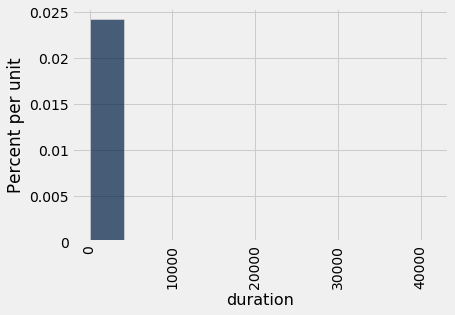

In [46]:
trips.hist("duration")

In [47]:
longest = trips.column("duration").max()
print("Longest trip took", longest/60, "hours.")

Longest trip took 688.1172222222223 hours.


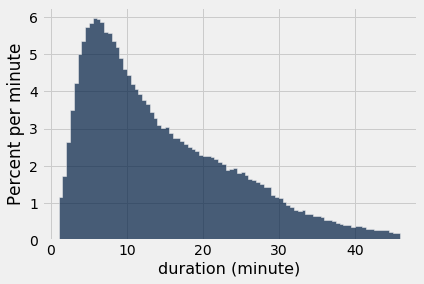

In [50]:
commute = trips.where('duration', are.below(46))
commute.hist('duration', bins=90, unit='minute')

Where did people pick up bikes?

In [51]:
starts = commute.group('start').sort('count', descending=True)
starts

start,count
12 Ave & W 40 St,2207
West St & Chambers St,2186
Pershing Square North,1711
Centre St & Chambers St,1494
Central Park S & 6 Ave,1466
E 17 St & Broadway,1450
W 20 St & 11 Ave,1416
South End Ave & Liberty St,1360
Grand Army Plaza & Central Park S,1330
Pier 40 - Hudson River Park,1322


* West St & Chambers St is near Stuyvesant High School, Borough of Manhattan Community College, and another ferry terminal, on the Hudson greenway bike trail
* 12 Ave & W 40 St is a ferry terminal on the Hudson greenway bike trail
* Pershing Square North is across from Grand Central Station

In [52]:
commute.pivot('start', 'end')

end               | 1 Ave & E 16 St | 1 Ave & E 18 St | 1 Ave & E 30 St | 1 Ave & E 44 St | 1 Ave & E 62 St | 1 Ave & E 68 St | 1 Ave & E 78 St | 1 Ave & E 94 St | 1 Pl & Clinton St | 10 Hudson Yards | 10 St & 5 Ave | 10 St & 7 Ave | 11 Ave & W 27 St | 11 Ave & W 41 St | 11 Ave & W 59 St | 12 Ave & W 40 St | 12 St & 4 Ave | 14 St & 5 Ave | 14 St & 7 Ave | 2 Ave  & E 104 St | 2 Ave & 9 St | 2 Ave & E 31 St | 2 Ave & E 96 St | 2 Ave & E 99 St | 21 St & 43 Ave | 21 St & Queens Plaza North | 3 Ave & 14 St | 3 Ave & E 100 St | 3 Ave & E 62 St | 3 Ave & E 71 St | 3 Ave & E 72 St | 3 St & 3 Ave | 3 St & 7 Ave | 3 St & Hoyt St | 3 St & Prospect Park West | 31 St & Thomson Ave | 4 Ave & 2 St | 4 Ave & 9 St | 44 Dr & Jackson Ave | 45 Rd & 11 St | 46 Ave & 5 St | 47 Ave & 31 St | 48 Ave & 5 St | 5 Ave & 3 St | 5 Ave & E 103 St | 5 Ave & E 29 St | 5 Ave & E 63 St | 5 Ave & E 73 St | 5 Ave & E 78 St | 5 Ave & E 88 St | 5 Ave & E 93 St | 5 St & 6 Ave | 6 Ave & 12 St | 6 Ave & 9 St | 6 Ave & Canal St | 6 Ave & Spring St | 6 Ave & W 33 St | 6 St & 7 Ave | 7 Ave & Park Pl | 7 St & 3 Ave | 7 St & 5 Ave | 8 Ave & W 16 St | 8 Ave & W 31 St | 8 Ave & W 33 St | 8 Ave & W 52 St | 9 Ave & W 18 St | 9 Ave & W 22 St | 9 Ave & W 28 St | 9 Ave & W 45 St | 9 St & 44 Rd | Adelphi St & Myrtle Ave | Albany Ave & Fulton St | Allen St & Hester St | Allen St & Rivington St | Allen St & Stanton St | Amsterdam Ave & W 66 St | Amsterdam Ave & W 73 St | Amsterdam Ave & W 79 St | Amsterdam Ave & W 82 St | Atlantic Ave & Fort Greene Pl | Atlantic Ave & Furman St | Avenue D & E 12 St | Avenue D & E 3 St | Avenue D & E 8 St | Baltic St & 5 Ave | Bank St & Hudson St | Bank St & Washington St | Banker St & Meserole Ave | Barclay St & Church St | Barrow St & Hudson St | Bayard St & Baxter St | Bayard St & Leonard St | Bedford Ave & Nassau Ave | Bedford Ave & S 9 St | Bergen St & Flatbush Ave | Bergen St & Smith St | Berkeley Pl & 6 Ave | Berkeley Pl & 7 Ave | Berry St & N 8 St | Bialystoker Pl & Delancey St | Boerum St & Broadway | Bond St & Bergen St | Bond St & Fulton St | Bond St & Schermerhorn St | Broad St & Bridge St | Broadway & Battery Pl | Broadway & Berry St | Broadway & E 14 St | Broadway & E 22 St | Broadway & Roebling St | Broadway & W 24 St | Broadway & W 29 St | Broadway & W 32 St | Broadway & W 36 St | Broadway & W 41 St | Broadway & W 49 St | Broadway & W 51 St | Broadway & W 53 St | Broadway & W 56 St | Broadway & W 58 St | Broadway & W 60 St | Broadway & Whipple St | Brooklyn Bridge Park - Pier 2 | Bus Slip & State St | Bushwick Ave & Powers St | Butler St & Court St | Cadman Plaza E & Red Cross Pl | Cadman Plaza E & Tillary St | Cadman Plaza West & Montague St | Cambridge Pl & Gates Ave | Carlton Ave & Flushing Ave | Carlton Ave & Park Ave | Carmine St & 6 Ave | Carroll St & 5 Ave | Carroll St & 6 Ave | Carroll St & Bond St | Carroll St & Columbia St | Carroll St & Smith St | Cathedral Pkwy & Broadway | Catherine St & Monroe St | Center Blvd & Borden Ave | Central Park North & Adam Clayton Powell Blvd | Central Park S & 6 Ave | Central Park W & W 96 St | Central Park West & W 100 St | Central Park West & W 102 St | Central Park West & W 68 St | Central Park West & W 72 St | Central Park West & W 76 St | Central Park West & W 85 St | Centre St & Chambers St | Centre St & Worth St | Cherry St | Christopher St & Greenwich St | Clark St & Henry St | Clermont Ave & Lafayette Ave | Clermont Ave & Park Ave | Cleveland Pl & Spring St | Cliff St & Fulton St | Clinton Ave & Flushing Ave | Clinton Ave & Myrtle Ave | Clinton St & 4 Place | Clinton St & Centre St | Clinton St & Grand St | Clinton St & Joralemon St | Clinton St & Tillary St | Clinton St & Union St | Coffey St & Conover St | Columbia Heights & Cranberry St | Columbia St & Degraw St | Columbia St & Kane St | Columbia St & Lorraine St | Columbia St & Rivington St | Columbia St & W 9 St | Columbus Ave & W 103 St | Columbus Ave & W 72 St | Columbus Ave & W 95 St | Commerce St & Van Brunt St | Concord St 

In [53]:
shortest = commute.group(["start", "end"], min)
shortest

start,end,duration min
1 Ave & E 16 St,1 Ave & E 16 St,1.46667
1 Ave & E 16 St,1 Ave & E 18 St,1.1
1 Ave & E 16 St,1 Ave & E 30 St,4.13333
1 Ave & E 16 St,1 Ave & E 44 St,8.41667
1 Ave & E 16 St,1 Ave & E 62 St,14.2167
1 Ave & E 16 St,1 Ave & E 68 St,11.2333
1 Ave & E 16 St,1 Ave & E 78 St,19.8333
1 Ave & E 16 St,10 Hudson Yards,16.3167
1 Ave & E 16 St,11 Ave & W 41 St,23.1833
1 Ave & E 16 St,12 Ave & W 40 St,17.65


Which stations can you get to fastest from Grand Central Station ('Pershing Square North')?

In [ ]:
from_gc = shortest.where("start", are.containing('Pershing Square North')).sort(2)
from_gc

## Maps

In [ ]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")
stations

How many trips started at each station?

In [ ]:
unique_stations = stations.group(["name", "lat", "lon"])
unique_stations

Map it!

In [ ]:
Marker.map_table(unique_stations.select("lat", "lon", "name"))

In [ ]:
Circle.map_table(unique_stations.select("lat", "lon", "name"), color='blue', radius=10)

In [ ]:
blue_stations = unique_stations.with_columns(
    "color", np.full(unique_stations.num_rows, "blue"),
    "radius", np.round(unique_stations.column("count")/100))
blue_stations

In [ ]:
Circle.map_table(blue_stations.select("lat", "lon", "name", "color", "radius"))

How long does it take to get to any other station from grand central?

In [ ]:
from_gc

In [ ]:
gc_dest = from_gc.join("end", unique_stations, "name")
gc_dest

In [ ]:
color_from_gc = gc_dest.with_columns(
    "color", np.full(gc_dest.num_rows, "blue"),
    "radius", gc_dest.column("duration min"))
color_from_gc

In [ ]:
Circle.map_table(color_from_gc.select("lat", "lon", "end", "color", "radius"))

About how long do people spend on trips from each station?

In [ ]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")\
                .with_column("duration", citi.column("tripduration")/60)
stations

In [ ]:
stations.group(["name", "lat", "lon"], np.median)

In [ ]:
def round_median(duration, interval=5):
    """Round the numbers in the array duration to bins of size interval"""
    return np.round(np.median(duration) / interval, 0) * interval

In [ ]:
round_median([10,15,5])

In [ ]:
round_median([11,15,5])

In [ ]:
round_median([11,14,16])

In [ ]:
round_median([21,22,5])

In [ ]:
duration_by_station = stations.group(["name", "lat", "lon"], round_median)
duration_by_station

In [ ]:
duration_by_station = duration_by_station.relabeled("duration round_median", "duration")
duration_by_station

In [ ]:
duration_by_station.group('duration')

In [ ]:
colors = duration_by_station.group('duration')\
                        .where('duration', are.below(30))\
                        .with_column('color', 
                make_array('blue', 'green', 'purple', 'red', 'orange'))
colors

In [ ]:
colored = duration_by_station.join('duration', colors)\
                             .select('lat', 'lon', 'name', 'color')
colored

In [ ]:
Marker.map_table(colored)